# 02807 Computational Tools for Data Science Group Project

## Importing the data

In [21]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# Read CSV files from 'data' directory
csv_files = glob.glob(os.path.join("data", "*.csv"))

In [23]:
# Generate Pandas DataFrames from CSV files
df_all = [pd.read_csv(file) for file in csv_files]

In [24]:
# Concatenate DataFrames
df = pd.concat(df_all, ignore_index=True)

In [25]:
df = df_all[0].sample(5000)

## Cleaning the data

In [26]:
# Inspect data types and missing values
pd.DataFrame({'Data Type': df.dtypes, 'Missing Values': df.isnull().sum(), 'Percentage Missing Values': round((df.isnull().sum() / len(df)) * 100, 2)})

,Data Type,Missing Values,Percentage Missing Values
carrier_code,object,0,0.00
flight_number,int64,0,0.00
origin_airport,object,0,0.00
destination_airport,object,0,0.00
date,object,0,0.00
scheduled_elapsed_time,int64,0,0.00
tail_number,object,18,0.36
departure_delay,int64,0,0.00
arrival_delay,int64,0,0.00
delay_carrier,int64,0,0.00


### Missing values

In [27]:
# Drop 'tail_number' column (due to missing values and insignificance)
df = df.drop(['tail_number'], axis=1)

In [28]:
# Drop rows with any missing values across all columns other than the departure and arrival columns (= cancelled flights)
df = df.dropna(subset=df.columns.difference(['actual_departure_dt', 'actual_arrival_dt']))

### Data types

In [29]:
# Convert date columns to datetime format
date_columns = ['date', 'scheduled_departure_dt', 'scheduled_arrival_dt', 'actual_departure_dt', 'actual_arrival_dt']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [30]:
# Enumerate and replace weather station identification numbers for readability
unique_values = pd.concat([df['STATION_x'], df['STATION_y']]).unique()

id_dict = {value: index + 1 for index, value in enumerate(unique_values)}

df['STATION_x'] = df['STATION_x'].replace(id_dict).astype(int)
df['STATION_y'] = df['STATION_y'].replace(id_dict).astype(int)

In [31]:
df

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,departure_delay,arrival_delay,delay_carrier,delay_weather,...,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
650481,AS,1032,IAD,SEA,2019-07-29,350,-6,-23,0,0,...,0.00,29.72,10.0,0.0,44,74.0,0.0,29.57,10.0,9.0
115947,F9,1183,PVD,MCO,2019-07-06,178,-7,9,0,0,...,0.00,29.75,10.0,18.0,14,79.0,0.0,29.96,10.0,13.0
540740,AS,1625,LAS,PDX,2019-07-24,135,-11,-13,0,0,...,0.00,27.68,10.0,6.0,8,81.0,0.0,30.02,10.0,15.0
538474,WN,996,DEN,OAK,2019-07-24,150,-2,1,0,0,...,0.00,24.68,10.0,3.0,88,80.0,0.0,29.84,10.0,14.0
279746,AA,5942,HSV,DFW,2019-07-13,124,45,23,11,0,...,0.11,29.36,10.0,9.0,22,91.0,0.0,29.20,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126481,G4,1614,PGD,PIT,2019-07-07,140,-10,-17,0,0,...,0.00,30.02,10.0,5.0,140,75.0,0.0,28.68,9.0,0.0
527808,AA,4214,TOL,ORD,2019-07-24,73,-6,-20,0,0,...,0.00,29.36,10.0,3.0,17,64.0,0.0,29.44,10.0,0.0
595017,UA,3941,ICT,ORD,2019-07-26,124,-11,-21,0,0,...,0.00,28.64,10.0,14.0,17,80.0,0.0,29.39,10.0,11.0
603706,NK,538,TPA,SJU,2019-07-27,175,-3,-4,0,0,...,0.00,30.16,10.0,3.0,40,86.0,0.0,30.12,9.0,15.0


### Feature engineering

In [32]:
# Categorising departure and arrival delays
def categorise_delay(delay):
    if delay <= 15:
        return 0  # Minor or no delay
    elif 15 < delay <= 60:
        return 1  # Moderate delay
    elif 60 < delay <= 120:
        return 2  # Significant delay
    else:
        return 3  # Severe delay
    
df['departure_delay_categorised'] = df['departure_delay'].apply(categorise_delay)
df['arrival_delay_categorised'] = df['arrival_delay'].apply(categorise_delay)

In [33]:
# Extracting historical measurements for each weather station
df_stations_x = df[[col for col in df.columns if '_x' in col]]
df_stations_y = df[[col for col in df.columns if '_y' in col]]

df_stations_x.columns = [col.replace('_x', '') for col in df_stations_x.columns]
df_stations_y.columns = [col.replace('_y', '') for col in df_stations_y.columns]

df_stations = pd.concat([df_stations_x, df_stations_y], ignore_index=True)

In [34]:
df_stations

,STATION,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyStationPressure,HourlyVisibility,HourlyWindSpeed
0,1,80.0,0.00,29.72,10.0,0.0
1,2,88.0,0.00,29.75,10.0,18.0
2,3,96.0,0.00,27.68,10.0,6.0
3,4,92.0,0.00,24.68,10.0,3.0
4,5,86.0,0.11,29.36,10.0,9.0
...,...,...,...,...,...,...
9935,140,75.0,0.00,28.68,9.0,0.0
9936,17,64.0,0.00,29.44,10.0,0.0
9937,17,80.0,0.00,29.39,10.0,11.0
9938,40,86.0,0.00,30.12,9.0,15.0


In [35]:
df_stations['STATION'].nunique()

319

In [36]:
# Generating historical measurements statistics for each weather station
def percentile(n):
    def percentile_(x):
        return x.quantile(n / 100.0)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

df_stations_stats = df_stations.groupby('STATION').agg({
    'HourlyDryBulbTemperature': ['mean', 'std'],
    'HourlyPrecipitation': [percentile(75), percentile(99)],
    'HourlyStationPressure': ['mean', 'std'],
    'HourlyVisibility': ['mean', 'std'],
    'HourlyWindSpeed': ['mean', 'std']
})

def non_zero_mean_std(series):
    non_zero_values = series[series > 0]
    
    if len(non_zero_values) > 0:
        return non_zero_values.agg([percentile(75), percentile(99)])
    else:
        return pd.Series({'percentile_75': 0, 'percentile_99': 0})

df_stations_precip_stats = df_stations.groupby('STATION')['HourlyPrecipitation'].apply(non_zero_mean_std).unstack()

df_stations_stats['HourlyPrecipitation'] = df_stations_precip_stats


In [37]:
df_stations_stats

HourlyDryBulbTemperature           HourlyPrecipitation                \
                            mean       std       percentile_75 percentile_99   
STATION                                                                        
1                      83.500000  7.265053               0.090        0.0900   
2                      78.129032  7.982238               0.010        0.0100   
3                      97.181395  7.040579               0.000        0.0000   
4                      79.896552  9.545380               0.065        0.1756   
5                      80.000000  5.114083               0.300        0.3000   
...                          ...       ...                 ...           ...   
315                    82.000000       NaN               0.000        0.0000   
316                    81.000000       NaN               0.000        0.0000   
317                    83.000000       NaN               0.000        0.0000   
318                    72.000000       NaN               0.020        0.0200   
319                    61.000000       NaN               0.000        0.0000   

        HourlyStationPressure           HourlyVisibility            \
                         mean       std             mean       std   
STATION                                                              
1                   29.638525  0.122688         9.930328  0.769554   
2                   29.908387  0.143134         9.741935  0.998924   
3                   27.587814  0.078069        10.000000  0.000000   
4                   24.684960  0.092926         9.912467  0.703546   
5                   29.362857  0.061822         9.928571  0.267261   
...                       ...       ...              ...       ...   
315                 27.940000       NaN        10.000000       NaN   
316                 29.790000       NaN        10.000000       NaN   
317                 28.870000       NaN        10.000000       NaN   
318                 29.710000       NaN        10.000000       NaN   
319                 29.700000       NaN         9.000000       NaN   

        HourlyWindSpeed            
                   mean       std  
STATION                            
1              6.516393  3.630071  
2              8.354839  4.070613  
3              9.088372  4.245570  
4              9.405836  4.716119  
5              6.071429  2.841026  
...                 ...       ...  
315            0.000000       NaN  
316            5.000000       NaN  
317           17.000000       NaN  
318            8.000000       NaN  
319           17.000000       NaN  

[319 rows x 10 columns]

In [38]:
# Categorising all weather measurements
def categorise_conditions(row, feature, df_stations_stats, suffix):
    station_id = row['STATION' + suffix]

    if feature == 'HourlyPrecipitation':
        station_stats = df_stations_stats.loc[station_id, feature]
        percentile_75 = station_stats['percentile_75']
        percentile_99 = station_stats['percentile_99']

        value = row[feature + suffix]

        if value < percentile_75:
            return 0  # None to minor rain
        elif value < percentile_99:
            return 1  # Moderate rain
        elif value >= percentile_99:
            return 2  # Heavy rain
        else:
            return 0
    
    elif feature == 'HourlyVisibility':
        station_stats = df_stations_stats.loc[station_id, feature]
        mean = station_stats['mean']
        std = station_stats['std']

        value = row[feature + suffix]

        if value < 2:
            return 2  # Poor visibility
        elif value < 5:
            return 1  # Moderate visibility
        else:
            return 0  # Good visibility
    
    else:
        station_stats = df_stations_stats.loc[station_id, feature]
        mean = station_stats['mean']
        std = station_stats['std']

        value = row[feature + suffix]

        if value < mean - 2 * std or value > mean + 2 * std:
            return 2  # Significantly above or below average
        elif value < mean - std or value > mean + std:
            return 1  # Above or below average
        else:
            return 0  # Average
        
for suffix in ['_x', '_y']:
    for feature in ['HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWindSpeed']:
        print(f'Processing: {feature + suffix}...')
        df[feature + suffix + '_categorised'] = df.apply(categorise_conditions, axis=1, args=(feature, df_stations_stats, suffix))
        print('    Complete')

Processing: HourlyDryBulbTemperature_x...
    Complete
Processing: HourlyPrecipitation_x...
    Complete
Processing: HourlyStationPressure_x...
    Complete
Processing: HourlyVisibility_x...
    Complete
Processing: HourlyWindSpeed_x...
    Complete
Processing: HourlyDryBulbTemperature_y...
    Complete
Processing: HourlyPrecipitation_y...
    Complete
Processing: HourlyStationPressure_y...
    Complete
Processing: HourlyVisibility_y...
    Complete
Processing: HourlyWindSpeed_y...
    Complete


In [39]:
categorised_columns = [col for col in df.columns if col.endswith('_categorised')]
remaining_columns = [col for col in df.columns if not col.endswith('_categorised')]

new_column_order = []

for col in remaining_columns:
    new_column_order.append(col)
    if col + '_categorised' in categorised_columns:
        new_column_order.append(col + '_categorised')

df = df[new_column_order]

In [46]:
df

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,departure_delay,departure_delay_categorised,arrival_delay,arrival_delay_categorised,...,HourlyDryBulbTemperature_y,HourlyDryBulbTemperature_y_categorised,HourlyPrecipitation_y,HourlyPrecipitation_y_categorised,HourlyStationPressure_y,HourlyStationPressure_y_categorised,HourlyVisibility_y,HourlyVisibility_y_categorised,HourlyWindSpeed_y,HourlyWindSpeed_y_categorised
650481,AS,1032,IAD,SEA,2019-07-29,350,-6,0,-23,0,...,74.0,0,0.0,0,29.57,0,10.0,0,9.0,0
115947,F9,1183,PVD,MCO,2019-07-06,178,-7,0,9,0,...,79.0,0,0.0,0,29.96,0,10.0,0,13.0,1
540740,AS,1625,LAS,PDX,2019-07-24,135,-11,0,-13,0,...,81.0,1,0.0,2,30.02,1,10.0,0,15.0,2
538474,WN,996,DEN,OAK,2019-07-24,150,-2,0,1,0,...,80.0,2,0.0,2,29.84,0,10.0,0,14.0,0
279746,AA,5942,HSV,DFW,2019-07-13,124,45,1,23,1,...,91.0,0,0.0,0,29.20,1,10.0,0,20.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126481,G4,1614,PGD,PIT,2019-07-07,140,-10,0,-17,0,...,75.0,0,0.0,0,28.68,0,9.0,0,0.0,1
527808,AA,4214,TOL,ORD,2019-07-24,73,-6,0,-20,0,...,64.0,2,0.0,0,29.44,1,10.0,0,0.0,2
595017,UA,3941,ICT,ORD,2019-07-26,124,-11,0,-21,0,...,80.0,0,0.0,0,29.39,1,10.0,0,11.0,0
603706,NK,538,TPA,SJU,2019-07-27,175,-3,0,-4,0,...,86.0,0,0.0,0,30.12,2,9.0,0,15.0,0


In [40]:
df.to_csv('df.csv')

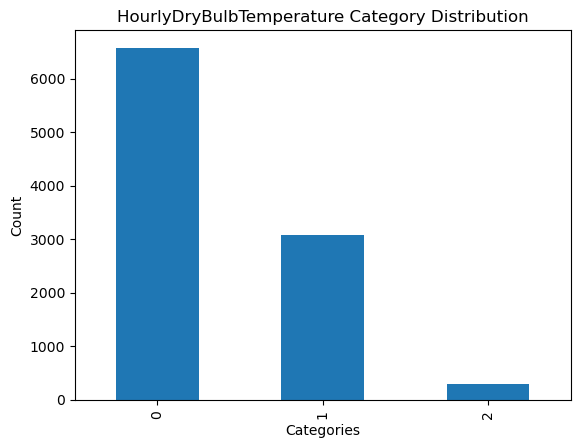

In [41]:
pd.concat([df['HourlyDryBulbTemperature_x_categorised'], df['HourlyDryBulbTemperature_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('HourlyDryBulbTemperature Category Distribution')
plt.show()

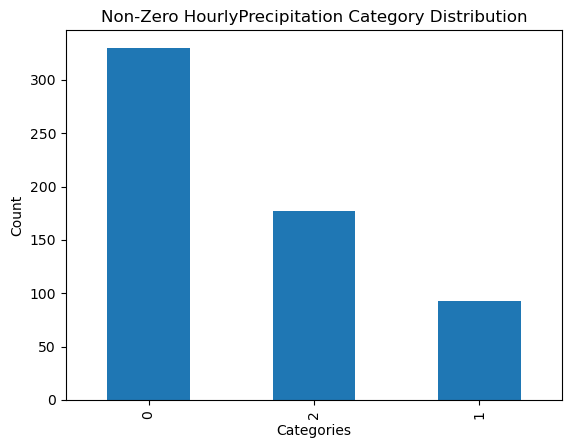

In [42]:
pd.concat([df[df['HourlyPrecipitation_x'] != 0]['HourlyPrecipitation_x_categorised'], df[df['HourlyPrecipitation_y'] != 0]['HourlyPrecipitation_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Non-Zero HourlyPrecipitation Category Distribution')
plt.show()

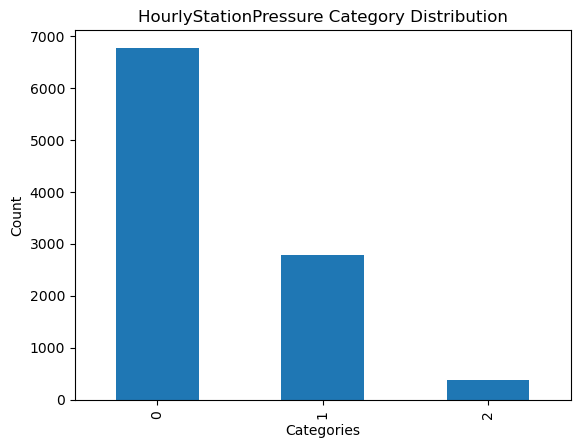

In [43]:
pd.concat([df['HourlyStationPressure_x_categorised'], df['HourlyStationPressure_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('HourlyStationPressure Category Distribution')
plt.show()

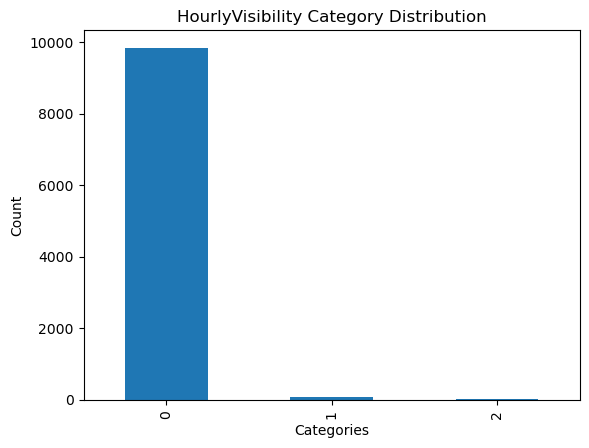

In [44]:
pd.concat([df['HourlyVisibility_x_categorised'], df['HourlyVisibility_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('HourlyVisibility Category Distribution')
plt.show()

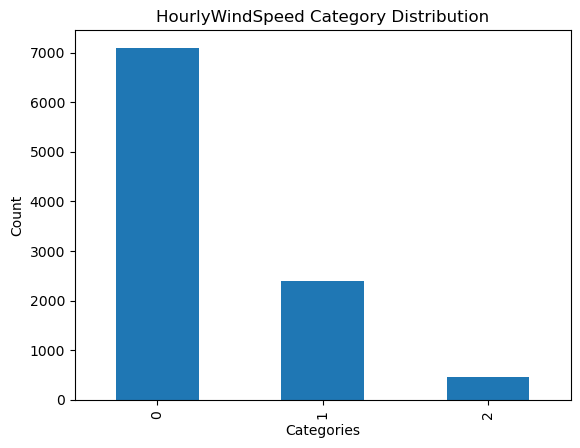

In [45]:
pd.concat([df['HourlyWindSpeed_x_categorised'], df['HourlyWindSpeed_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('HourlyWindSpeed Category Distribution')
plt.show()